# Imports and setup

In [2]:
import cv2
import mediapipe as mp
import csv
import os


import pandas as pd

# Create Data Folder & CSV

In [3]:
DATA_PATH = "../data"
os.makedirs(DATA_PATH, exist_ok=True)
CSV_FILE = os.path.join(DATA_PATH, "gestures.csv")

# If file doesn't exist, create header
if not os.path.isfile(CSV_FILE):
    with open(CSV_FILE, "w", newline="") as f:
        writer = csv.writer(f)
        header = ["label"] + [f"{axis}{i}" for i in range(21) for axis in ["x","y","z"]]
        writer.writerow(header)

# Define Gestures label

In [4]:
GESTURES = {
    "1": "fist",
    "2": "open",
    "3": "peace",
}

# Hand Landmark Extraction

In [5]:
width,height=1280,720

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
cap.set(3,height)
cap.set(4,width)

current_label = None

with mp_hands.Hands(max_num_hands=1,
                    min_detection_confidence=0.7,
                    min_tracking_confidence=0.7) as hands:

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.flip(frame, 1)
        # Converts the frame from BGR (OpenCV default) to RGB (MediaPipe expects RGB).
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(rgb)

        if result.multi_hand_landmarks:
            for landmarks in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, landmarks, mp_hands.HAND_CONNECTIONS)

                if current_label:
                    coords = [[lm.x, lm.y, lm.z] for lm in landmarks.landmark]
                    flat_coords = sum(coords, [])
                    with open(CSV_FILE, "a", newline="") as f:
                        writer = csv.writer(f)
                        writer.writerow([current_label] + flat_coords)

        # Show the frame
        cv2.imshow("Hand Gesture Data Collector", frame)

        # Handle key input
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # ESC to quit
            break
        elif chr(key) in GESTURES:
            current_label = GESTURES[chr(key)]
            print("Recording gesture:", current_label)

            
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()

c:\AUsers\Amalia\Facultate\An4\Block1\Ai\Computer Vision\venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Recording gesture: open
Recording gesture: open
Recording gesture: open
Recording gesture: fist
Recording gesture: fist
Recording gesture: fist
Recording gesture: fist
Recording gesture: fist
Recording gesture: peace
Recording gesture: peace
Recording gesture: peace
Recording gesture: peace
Recording gesture: peace


# Data Preprocessing

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r"C:\AUsers\Amalia\Facultate\An4\Block1\Ai\Computer Vision\data\gestures.csv")

# Remove exact duplicate rows
df_unique = df.drop_duplicates()

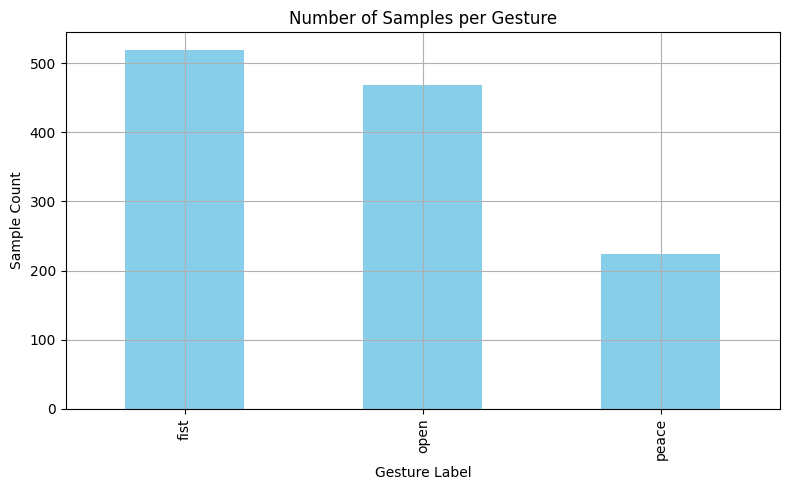

In [8]:
# Count samples per gesture
gesture_counts = df_unique.iloc[:, 0].value_counts()

# Bar chart
plt.figure(figsize=(8, 5))
gesture_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Samples per Gesture")
plt.xlabel("Gesture Label")
plt.ylabel("Sample Count")
plt.grid(True)
plt.tight_layout()
plt.show()